<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Water_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [21]:
np.around(data.describe(), 2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.00,2011.00,2011.00,2011.00,2011.00,2011.00,2011.00,2011.00,2011.00,2011.00
mean,7.09,195.97,21917.44,7.13,333.22,426.53,14.36,66.40,3.97,0.40
std,1.57,32.64,8642.24,1.58,41.21,80.71,3.32,16.08,0.78,0.49
min,0.23,73.49,320.94,1.39,129.00,201.62,2.20,8.58,1.45,0.00
25%,6.09,176.74,15615.67,6.14,307.63,366.68,12.12,55.95,3.44,0.00
50%,7.03,197.19,20933.51,7.14,332.23,423.46,14.32,66.54,3.97,0.00
75%,8.05,216.44,27182.59,8.11,359.33,482.37,16.68,77.29,4.51,1.00
max,14.00,317.34,56488.67,13.13,481.03,753.34,27.01,124.00,6.49,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


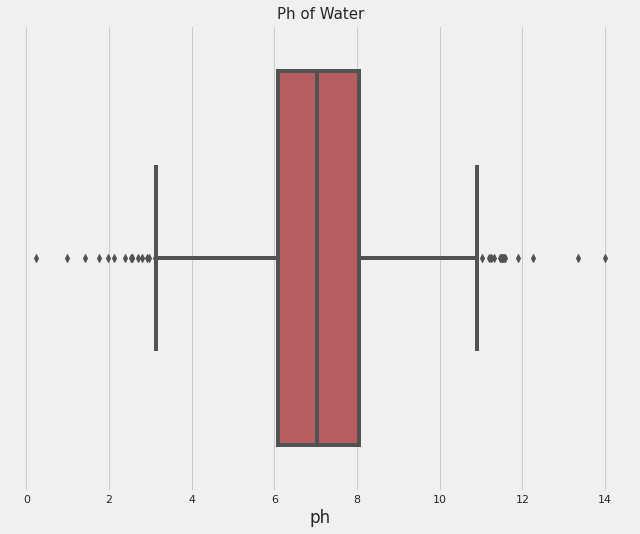

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(data.ph, color='r')
plt.title("Ph of Water",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Correlation between values')

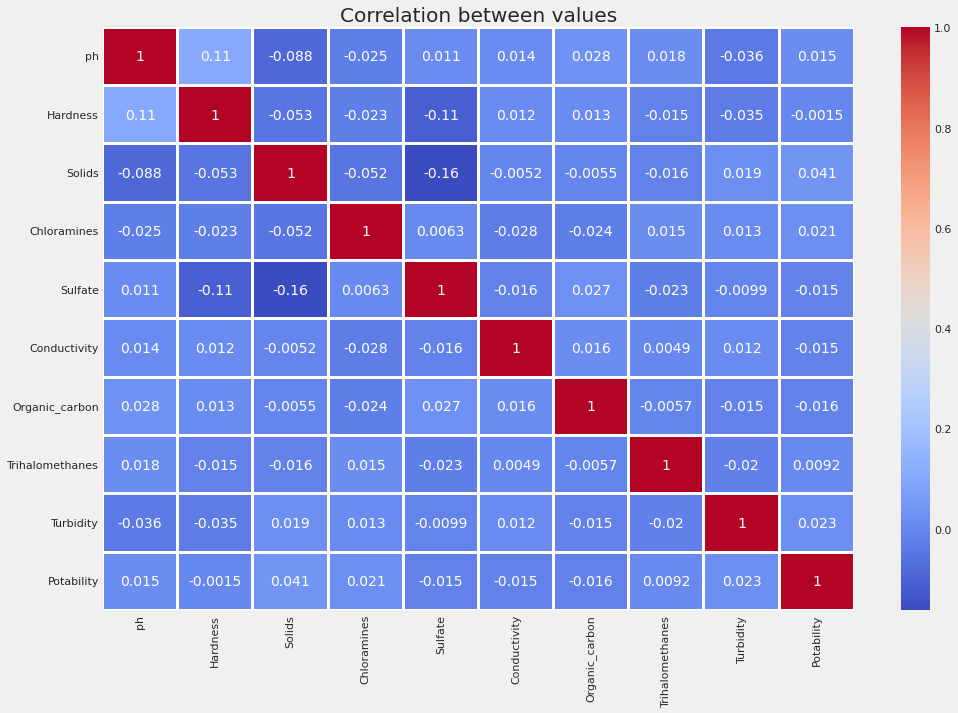

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=2, linecolor='white', annot=True)
plt.title("Correlation between values")


In [28]:
a = data.groupby(['Potability'])['ph'].count()
a

Potability
0    1200
1     811
Name: ph, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


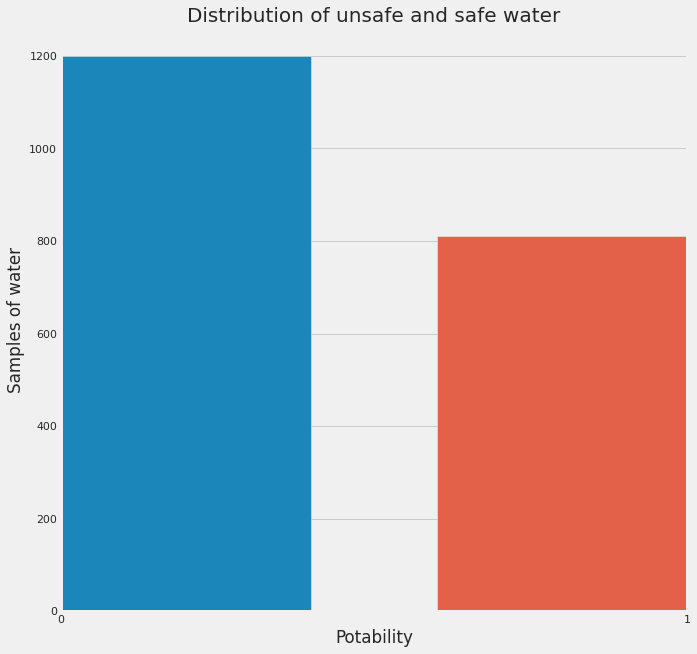

In [53]:
plt.figure(figsize=(10, 10))
sns.countplot(data.Potability)
plt.title("Distribution of unsafe and safe water", fontsize=20)
plt.xlim(0,1)
plt.ylabel("Samples of water")
plt.show()

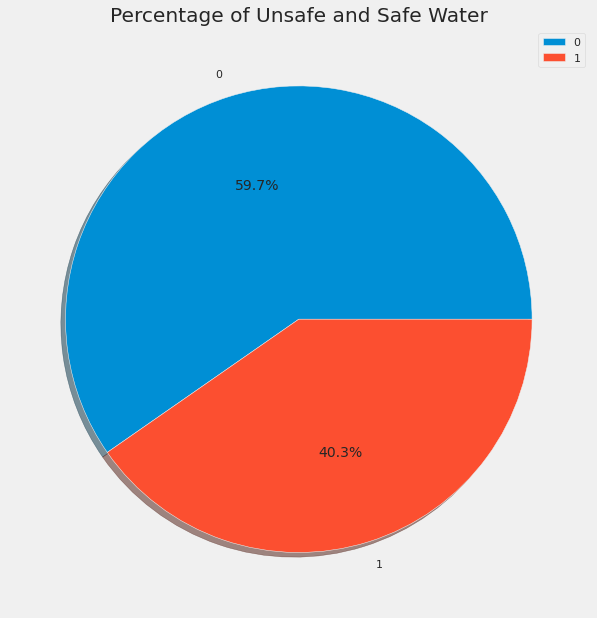

In [56]:
colors = ['#880808', '#00FFFF']
plt.figure(figsize=(10,10))
plt.pie(x = a.values,labels = a.index, shadow=True, autopct='%1.1f%%', )
plt.title("Percentage of Unsafe and Safe Water")
plt.legend()
plt.show()

In [57]:
import plotly.express as px

figure = px.histogram(data, x='ph',
                      color='Potability',
                      title="Factors affecting Water Quality: Ph") 
figure.show()

In [59]:
figure = px.histogram(data, x='Hardness',
                      color='Potability',
                      title="Factors affecting Water Quality: Hardness") 
figure.show()